In [1]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import torch



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.9861337078574212..4.829584218436117].


Input data shape: (128, 128, 14)
Data NDVI shape: (128, 128) f_data shape: (1, 128, 128, 3)


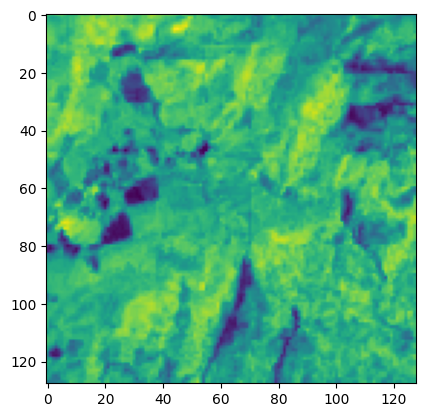

In [2]:
# Testing the dataset
path_single = "archive-3/TrainData/img/image_1.h5"
path_single_mask = 'archive-3/TrainData/mask/mask_1.h5'

with h5py.File(path_single, 'r') as hdf:
    data = np.array(hdf.get('img'))
    print("Input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))
    
    f_data = np.zeros((1, 128, 128, 3))
    f_data[0, :, :, 0] = data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("Data NDVI shape:", data_ndvi.shape, "f_data shape:", f_data.shape)
    plt.imshow(data_ndvi)



Mask data shape: (128, 128)


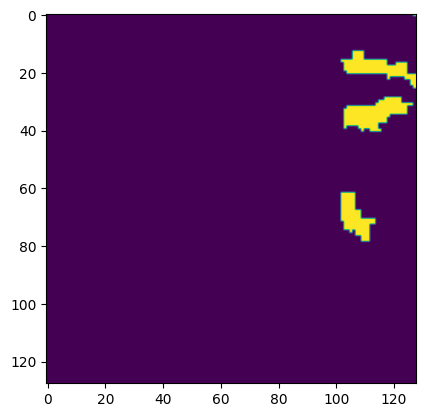

In [3]:
    
with h5py.File(path_single_mask, 'r') as hdf:
    mask_data = np.array(hdf.get('mask'))
    print("Mask data shape:", mask_data.shape)
    plt.imshow(mask_data)

In [4]:
TRAIN_PATH = "archive-3/TrainData/img/*.h5"
TRAIN_MASK = "archive-3/TrainData/mask/*.h5"



In [5]:
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))



In [6]:
num_samples = len(all_train)
TRAIN_XX = np.zeros((num_samples, 128, 128, 6))
TRAIN_YY = np.zeros((num_samples, 128, 128, 1))




In [7]:
for i, (img_path, mask_path) in enumerate(zip(all_train, all_mask)):
    print(f"Processing {i+1}/{num_samples}: {img_path}, {mask_path}")
    with h5py.File(img_path, 'r') as hdf:
        data = np.array(hdf.get('img'))
        data[np.isnan(data)] = 0.000001  # Assign small value to NaNs

        # Normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # NDVI calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red) + 1e-6)  # Avoid division by zero

        # Final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi  # NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope  # SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION

    with h5py.File(mask_path, 'r') as hdf:
        mask_data = np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = mask_data



Processing 1/3799: archive-3/TrainData/img/image_1.h5, archive-3/TrainData/mask/mask_1.h5
Processing 2/3799: archive-3/TrainData/img/image_10.h5, archive-3/TrainData/mask/mask_10.h5
Processing 3/3799: archive-3/TrainData/img/image_100.h5, archive-3/TrainData/mask/mask_100.h5
Processing 4/3799: archive-3/TrainData/img/image_1000.h5, archive-3/TrainData/mask/mask_1000.h5
Processing 5/3799: archive-3/TrainData/img/image_1001.h5, archive-3/TrainData/mask/mask_1001.h5
Processing 6/3799: archive-3/TrainData/img/image_1002.h5, archive-3/TrainData/mask/mask_1002.h5
Processing 7/3799: archive-3/TrainData/img/image_1003.h5, archive-3/TrainData/mask/mask_1003.h5
Processing 8/3799: archive-3/TrainData/img/image_1004.h5, archive-3/TrainData/mask/mask_1004.h5
Processing 9/3799: archive-3/TrainData/img/image_1005.h5, archive-3/TrainData/mask/mask_1005.h5
Processing 10/3799: archive-3/TrainData/img/image_1006.h5, archive-3/TrainData/mask/mask_1006.h5
Processing 11/3799: archive-3/TrainData/img/image_1

/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_55285/4248968822.py:22: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope  # SLOPE


Processing 1788/3799: archive-3/TrainData/img/image_2607.h5, archive-3/TrainData/mask/mask_2607.h5
Processing 1789/3799: archive-3/TrainData/img/image_2608.h5, archive-3/TrainData/mask/mask_2608.h5
Processing 1790/3799: archive-3/TrainData/img/image_2609.h5, archive-3/TrainData/mask/mask_2609.h5
Processing 1791/3799: archive-3/TrainData/img/image_261.h5, archive-3/TrainData/mask/mask_261.h5
Processing 1792/3799: archive-3/TrainData/img/image_2610.h5, archive-3/TrainData/mask/mask_2610.h5
Processing 1793/3799: archive-3/TrainData/img/image_2611.h5, archive-3/TrainData/mask/mask_2611.h5
Processing 1794/3799: archive-3/TrainData/img/image_2612.h5, archive-3/TrainData/mask/mask_2612.h5
Processing 1795/3799: archive-3/TrainData/img/image_2613.h5, archive-3/TrainData/mask/mask_2613.h5
Processing 1796/3799: archive-3/TrainData/img/image_2614.h5, archive-3/TrainData/mask/mask_2614.h5
Processing 1797/3799: archive-3/TrainData/img/image_2615.h5, archive-3/TrainData/mask/mask_2615.h5
Processing 1

In [8]:
# Replace NaNs in TRAIN_XX
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print("TRAIN_XX min:", TRAIN_XX.min(), "max:", TRAIN_XX.max())
print("TRAIN_YY min:", TRAIN_YY.min(), "max:", TRAIN_YY.max())

TRAIN_XX min: -1.0 max: 1.0
TRAIN_YY min: 0.0 max: 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7836734693877552].


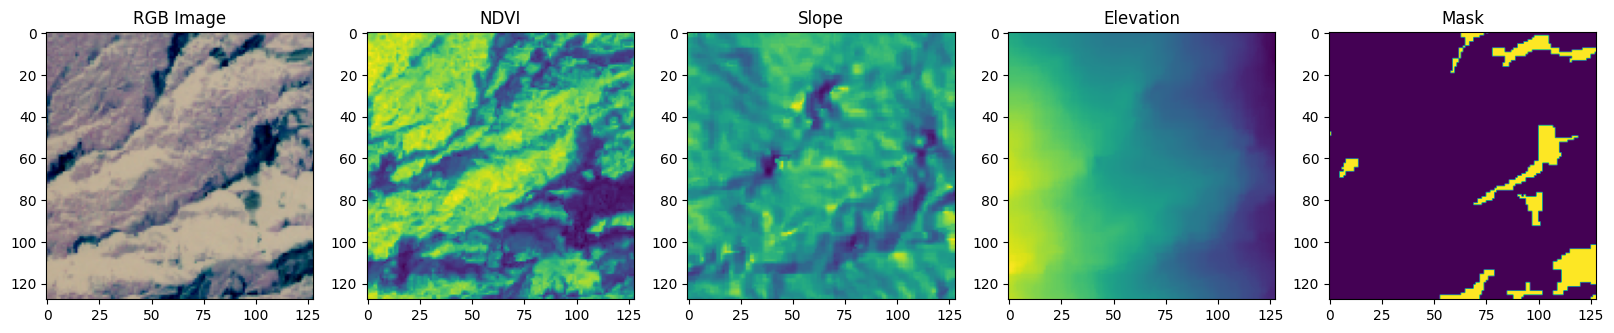

In [9]:
img_idx = 234
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

axes[0].set_title("RGB Image")
axes[0].imshow(TRAIN_XX[img_idx, :, :, 0:3])

axes[1].set_title("NDVI")
axes[1].imshow(TRAIN_XX[img_idx, :, :, 3])

axes[2].set_title("Slope")
axes[2].imshow(TRAIN_XX[img_idx, :, :, 4])

axes[3].set_title("Elevation")
axes[3].imshow(TRAIN_XX[img_idx, :, :, 5])

axes[4].set_title("Mask")
axes[4].imshow(TRAIN_YY[img_idx, :, :, 0] )

plt.show()


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle=True, random_state=42
)

print("Training data shape:", x_train.shape, y_train.shape)
print("Validation data shape:", x_valid.shape, y_valid.shape)

Training data shape: (3039, 128, 128, 6) (3039, 128, 128, 1)
Validation data shape: (760, 128, 128, 6) (760, 128, 128, 1)


In [11]:
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

class LandslideDataset(Dataset):
    def __init__(self, images, masks):
        self.images = images
        self.masks = masks

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        mask = self.masks[idx]

        # Transpose image dimensions from HWC to CHW
        img = np.transpose(img, (2, 0, 1))
        mask = np.transpose(mask, (2, 0, 1))

        # Convert to tensors
        img = torch.from_numpy(img).float()
        mask = torch.from_numpy(mask).float()

        return img, mask

In [13]:
train_dataset = LandslideDataset(x_train, y_train)
valid_dataset = LandslideDataset(x_valid, y_valid)

In [14]:
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    """Double Convolution Block"""
    def __init__(self, in_channels, out_channels, mid_channels=None, p=0.1):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Dropout(p)
        )

    def forward(self, x):
        return self.double_conv(x)

class Down(nn.Module):
    """Downscaling Block"""
    def __init__(self, in_channels, out_channels, p=0.1):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels, p=p)
        )

    def forward(self, x):
        return self.maxpool_conv(x)

class Up(nn.Module):
    """Upscaling Block"""
    def __init__(self, in_channels, out_channels, bilinear=True, p=0.1):
        super().__init__()
        # If bilinear, use Upsample, otherwise ConvTranspose2d
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2, p=p)
        else:
            self.up = nn.ConvTranspose2d(in_channels , in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels, p=p)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # Pad x1 to match x2 size
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]
        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        # Concatenate
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_channels=6, n_classes=1, bilinear=True, p=0.1):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes

        self.inc = DoubleConv(n_channels, 16, p=p)
        self.down1 = Down(16, 32, p=p)
        self.down2 = Down(32, 64, p=p)
        self.down3 = Down(64, 128, p=p)
        factor = 2 if bilinear else 1
        self.down4 = Down(128, 256 // factor, p=p)

        self.up1 = Up(256, 128 // factor, bilinear, p=p)
        self.up2 = Up(128, 64 // factor, bilinear, p=p)
        self.up3 = Up(64, 32 // factor, bilinear, p=p)
        self.up4 = Up(32, 16, bilinear, p=p)
        self.outc = nn.Conv2d(16, n_classes, kernel_size=1)

    def forward(self, x):
        x1 = self.inc(x)    # 16 channels
        x2 = self.down1(x1) # 32 channels
        x3 = self.down2(x2) # 64 channels
        x4 = self.down3(x3) # 128 channels
        x5 = self.down4(x4) # 256 channels

        x = self.up1(x5, x4)    # x5 upsampled and concatenated with x4
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        output = torch.sigmoid(logits)
        return output


In [16]:
def dice_loss(pred, target, smooth=1e-5):
    pred = pred.contiguous()
    target = target.contiguous()
    
    intersection = (pred * target).sum(dim=2).sum(dim=2)
    loss = 1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth))
    
    return loss.mean()

def combined_loss(pred, target):
    bce = F.binary_cross_entropy(pred, target)
    d_loss = dice_loss(pred, target)
    return bce + d_loss


In [18]:
import torch.optim as optim

# Initialize the model, optimizer, and criterion
model = UNet(n_channels=6, n_classes=1)
device = 'mps'
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-4)
num_epochs = 30

# For storing training and validation loss
train_losses = []
valid_losses = []
best_valid_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = combined_loss(outputs, masks)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_train_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for images, masks in valid_loader:
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)
            loss = combined_loss(outputs, masks)
            valid_loss += loss.item()
    avg_valid_loss = valid_loss / len(valid_loader)
    valid_losses.append(avg_valid_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_valid_loss:.4f}")

    # Save the best model
    if avg_valid_loss < best_valid_loss:
        best_valid_loss = avg_valid_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print("Saved Best Model")


Epoch 1/30, Training Loss: 1.2367, Validation Loss: 1.1184
Saved Best Model
Epoch 2/30, Training Loss: 1.0016, Validation Loss: 0.8763
Saved Best Model
Epoch 3/30, Training Loss: 0.8291, Validation Loss: 0.7269
Saved Best Model
Epoch 4/30, Training Loss: 0.7136, Validation Loss: 0.5899
Saved Best Model
Epoch 5/30, Training Loss: 0.7018, Validation Loss: 0.6274
Epoch 6/30, Training Loss: 0.7279, Validation Loss: 0.5688
Saved Best Model
Epoch 7/30, Training Loss: 0.7146, Validation Loss: 0.5648
Saved Best Model
Epoch 8/30, Training Loss: 0.6588, Validation Loss: 0.6429
Epoch 9/30, Training Loss: 0.6715, Validation Loss: 0.5457
Saved Best Model
Epoch 10/30, Training Loss: 0.6277, Validation Loss: 0.6969
Epoch 11/30, Training Loss: 0.6662, Validation Loss: 0.4990
Saved Best Model
Epoch 12/30, Training Loss: 0.5641, Validation Loss: 0.4922
Saved Best Model
Epoch 13/30, Training Loss: 0.5326, Validation Loss: 0.4911
Saved Best Model
Epoch 14/30, Training Loss: 0.5158, Validation Loss: 0.5179

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.load_state_dict(torch.load('best_model.pth'))
model.eval()

all_preds = []
all_masks = []

with torch.no_grad():
    for images, masks in valid_loader:
        images = images.to(device)
        masks = masks.to(device)
        outputs = model(images)
        preds = (outputs > 0.5).float()
        all_preds.append(preds.cpu().numpy())
        all_masks.append(masks.cpu().numpy())

all_preds = np.concatenate(all_preds, axis=0)
all_masks = np.concatenate(all_masks, axis=0)

# Flatten arrays
all_preds_flat = all_preds.flatten()
all_masks_flat = all_masks.flatten()

accuracy = accuracy_score(all_masks_flat, all_preds_flat)
precision = precision_score(all_masks_flat, all_preds_flat)
recall = recall_score(all_masks_flat, all_preds_flat)
f1 = f1_score(all_masks_flat, all_preds_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/var/folders/n_/4p37f261177fmjpv4kt7x33m0000gn/T/ipykernel_55285/3382819444.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.

Accuracy: 0.9797
Precision: 0.5718
Recall: 0.7018
F1 Score: 0.6302


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8178192].


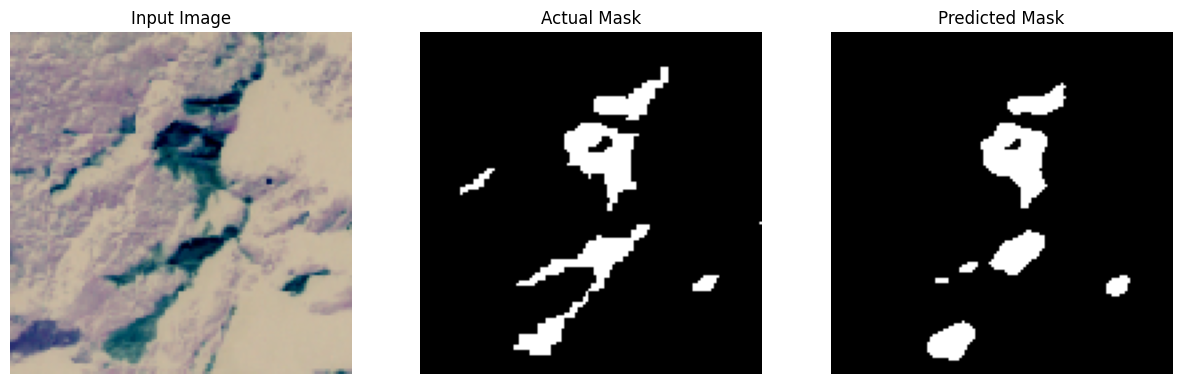

In [20]:
# Select a random sample from the validation set
idx = np.random.randint(0, len(valid_dataset))
sample_img, sample_mask = valid_dataset[idx]

# Move the sample to the device
sample_img = sample_img.unsqueeze(0).to(device)
sample_mask = sample_mask.to(device)

with torch.no_grad():
    pred_mask = model(sample_img)
    pred_mask = (pred_mask > 0.5).float()

# Convert tensors to numpy arrays for visualization
sample_img_np = sample_img.cpu().squeeze().numpy()
sample_mask_np = sample_mask.cpu().squeeze().numpy()
pred_mask_np = pred_mask.cpu().squeeze().numpy()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Input Image (displaying RGB channels)
axes[0].imshow(np.transpose(sample_img_np[0:3], (1, 2, 0)))
axes[0].set_title('Input Image')
axes[0].axis('off')

# Actual Mask
axes[1].imshow(sample_mask_np, cmap='gray')
axes[1].set_title('Actual Mask')
axes[1].axis('off')

# Predicted Mask
axes[2].imshow(pred_mask_np, cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.show()

In [27]:
# Paths to validation images

import os

validation_url = 'archive-3/ValidData/img/*.h5'
img_val_paths = sorted(glob.glob(validation_url))

# Initialize array to hold validation images
num_val_samples = len(img_val_paths)
VAL_XX = np.zeros((num_val_samples, 128, 128, 6))

mask_names = []

for i, img_path in enumerate(img_val_paths):
    print(f"Processing validation image {i+1}/{num_val_samples}: {img_path}")
    mask_name = os.path.basename(img_path).replace('image', 'mask')
    mask_names.append(mask_name)
    with h5py.File(img_path, 'r') as hdf:
        data = np.array(hdf.get('img'))
        data[np.isnan(data)] = 0.000001  # Assign small value to NaNs

        # Normalize the data
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # NDVI calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red) + 1e-6)  # Avoid division by zero

        # Final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  # RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb  # GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb  # BLUE
        VAL_XX[i, :, :, 3] = data_ndvi  # NDVI
        VAL_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope  # SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation  # ELEVATION

# Replace NaNs in VAL_XX
VAL_XX[np.isnan(VAL_XX)] = 0.000001


Processing validation image 1/245: archive-3/ValidData/img/image_1.h5
Processing validation image 2/245: archive-3/ValidData/img/image_10.h5
Processing validation image 3/245: archive-3/ValidData/img/image_100.h5
Processing validation image 4/245: archive-3/ValidData/img/image_101.h5
Processing validation image 5/245: archive-3/ValidData/img/image_102.h5
Processing validation image 6/245: archive-3/ValidData/img/image_103.h5
Processing validation image 7/245: archive-3/ValidData/img/image_104.h5
Processing validation image 8/245: archive-3/ValidData/img/image_105.h5
Processing validation image 9/245: archive-3/ValidData/img/image_106.h5
Processing validation image 10/245: archive-3/ValidData/img/image_107.h5
Processing validation image 11/245: archive-3/ValidData/img/image_108.h5
Processing validation image 12/245: archive-3/ValidData/img/image_109.h5
Processing validation image 13/245: archive-3/ValidData/img/image_11.h5
Processing validation image 14/245: archive-3/ValidData/img/imag

In [28]:
# Convert VAL_XX to PyTorch tensors
# Transpose from (N, H, W, C) to (N, C, H, W)
VAL_XX_tensor = torch.from_numpy(np.transpose(VAL_XX, (0, 3, 1, 2))).float()




In [29]:
# Move validation data to the appropriate device
VAL_XX_tensor = VAL_XX_tensor.to(device)

# Set the model to evaluation mode
model.eval()

# Disable gradient computation for inference
with torch.no_grad():
    # Get predictions
    preds = model(VAL_XX_tensor)
    # Apply threshold to get binary masks
    threshold = 0.5
    preds_binary = (preds > threshold).float()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8046301524562394].


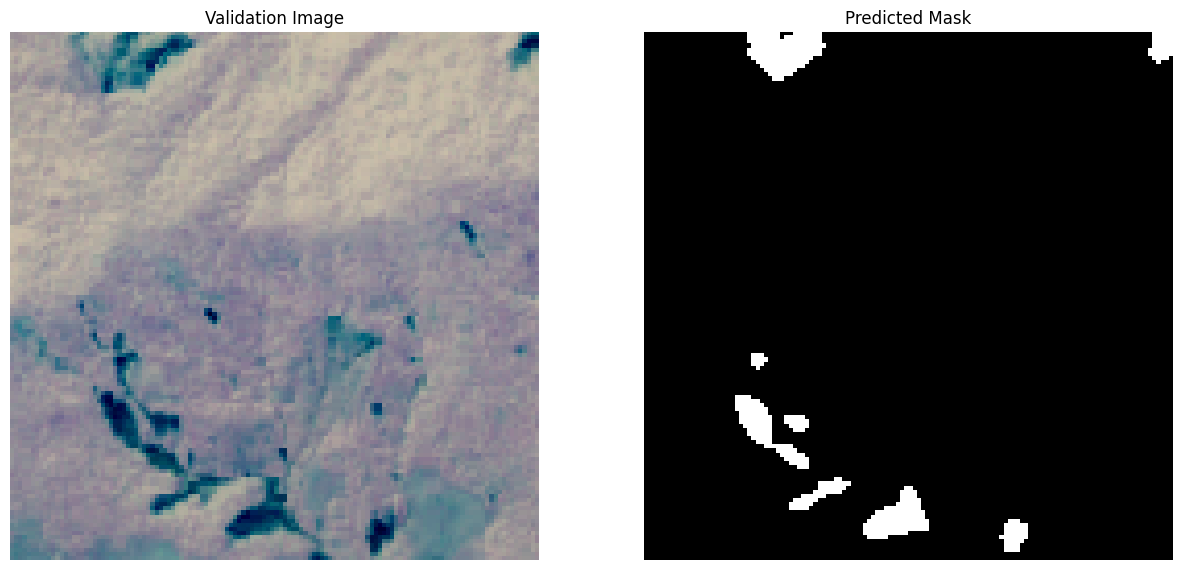

In [30]:
import matplotlib.pyplot as plt

# Choose an index to visualize
img_idx = 167  # You can change this to visualize different images

# Get the input image, predicted mask, and optionally the ground truth mask
input_image = VAL_XX[img_idx]  # Shape: (128, 128, 6)
predicted_mask = preds_binary[img_idx].cpu().numpy()  # Shape: (1, 128, 128)

# If you have ground truth masks, load and use them
# For example:
# ground_truth_mask = VAL_YY[img_idx, :, :, 0]

# Visualize the image and masks
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Display the RGB image (first 3 channels)
axes[0].imshow(input_image[:, :, 0:3])
axes[0].set_title('Validation Image')
axes[0].axis('off')

# Display the predicted mask
axes[1].imshow(predicted_mask[0], cmap='gray')
axes[1].set_title('Predicted Mask')
axes[1].axis('off')

plt.show()
